**ACTIVIDADES**


---

Una empresa de tarjetas de crédito desea desarrollar un modelo de clasificación para
predecir si un cliente aprobará su solicitud de crédito. La empresa cuenta con información
histórica de clientes, incluyendo su edad, ingresos, historial crediticio y nivel de deuda.
Tu tarea es construir un modelo de Árbol de Decisión que permita predecir si un cliente será
Aprobado (1) o No Aprobado (0).
Además, debes:
1. Visualizar los datos con gráficos adecuados.
2. Entrenar el modelo de Árbol de Decisión utilizando scikit-learn.
3. Evaluar el rendimiento del modelo con métricas como precisión y matriz de confusión.
4. Graficar el árbol de decisión para entender su estructura de decisiones.
Definimos el conjunto de datos ficticio con 20 clientes, que incluye las siguientes
características:

• Edad (en años)

• Ingresos (en miles de dólares)

• Historial Crediticio (1 = Bueno, 0 = Malo)

• Nivel de Deuda (0 = Baja, 1 = Alta)

• Aprobado (1 = Sí, 0 = No) → Variable Objetivo
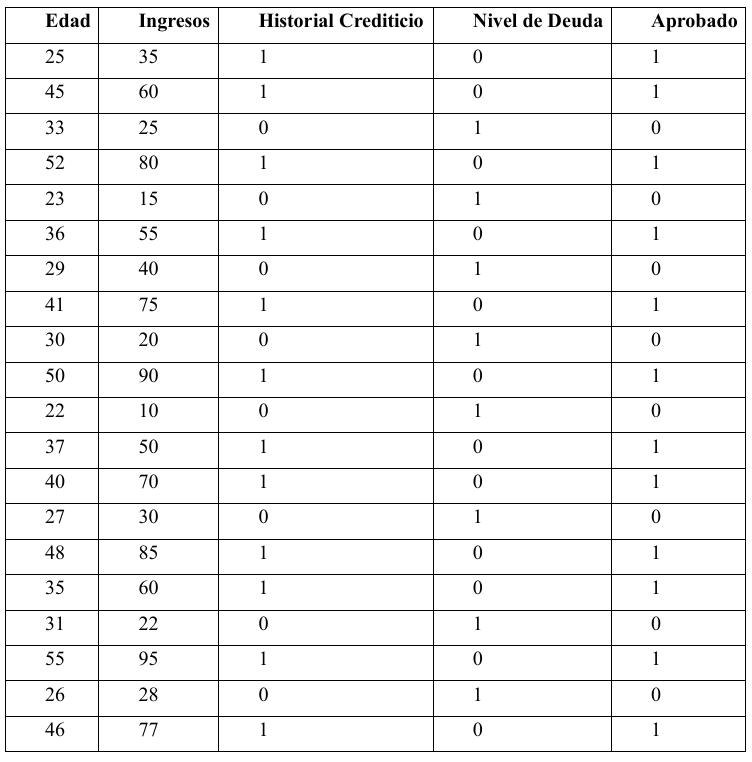


In [15]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# 2. Crear el conjunto de datos ficticio
data = {
"Edad": [25, 45, 33, 52, 23, 36, 29, 41, 30, 50,
22, 37, 40, 27, 48, 35, 31, 55, 26, 46],
"Ingresos": [35, 60, 25, 80, 15, 55, 40, 75, 20, 90,
10, 50, 70, 30, 85, 60, 22, 95, 28, 77],
"Historial_Crediticio": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
0, 1, 1, 0, 1, 1, 0, 1, 0, 1],
"Nivel_Deuda": [0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
"Aprobado": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
0, 1, 1, 0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

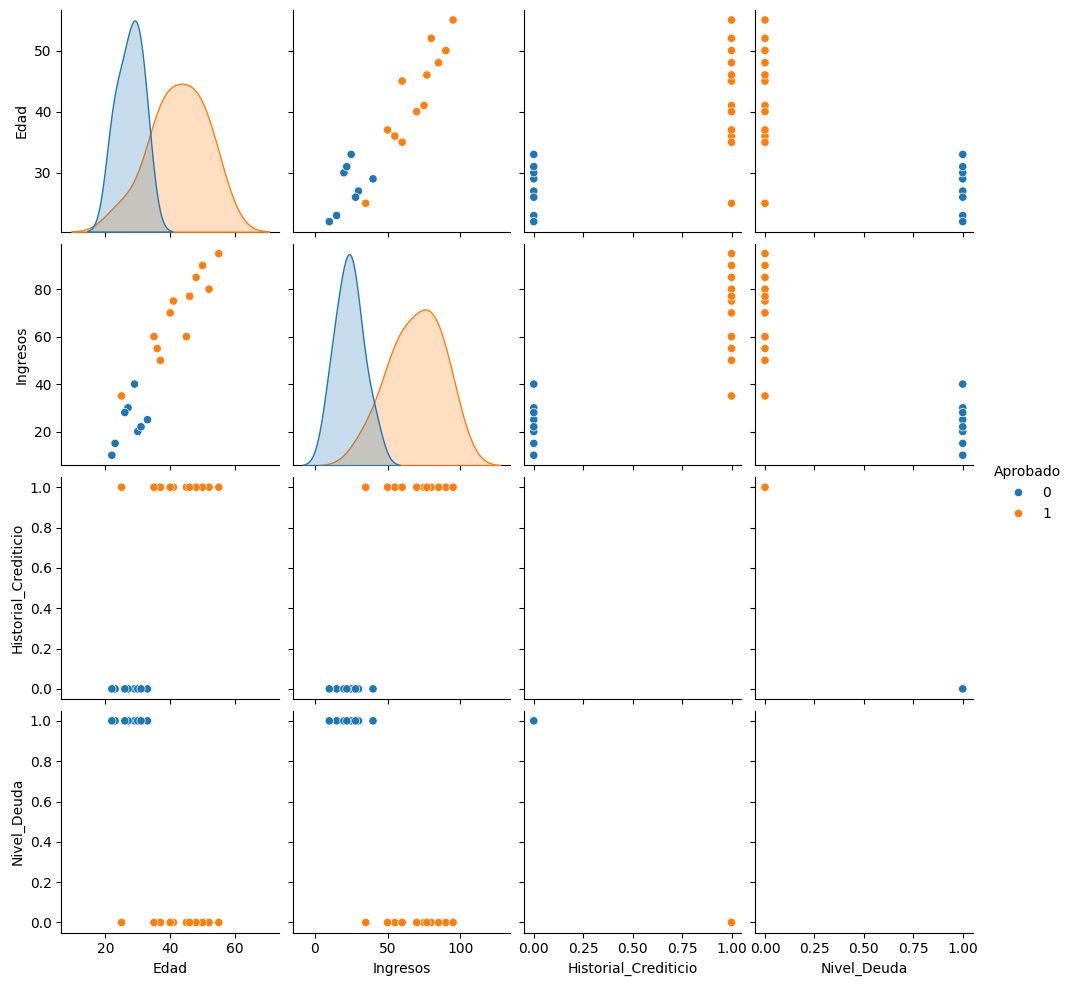

In [18]:
# 3. Visualizar los datos
sns.pairplot(df, hue="Aprobado", diag_kind="kde")
plt.show()

In [19]:
# 4. Separar variables independientes y dependientes
X = df.drop(columns=["Aprobado"])
y = df["Aprobado"]

In [20]:
# 5. Dividir en datos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 6. Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
# 7. Realizar predicciones
y_pred = model.predict(X_test)

In [23]:
#  8. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 0.75

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
#  9. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

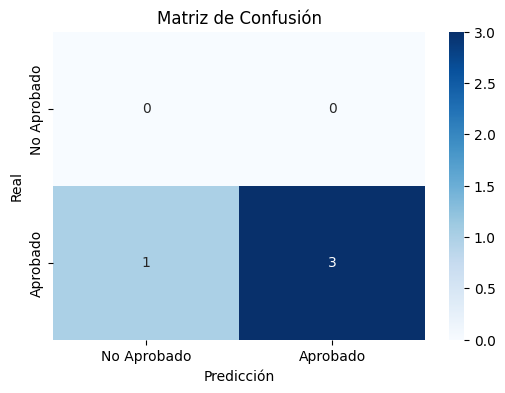

In [25]:
# 10. Visualizar Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Aprobado",
"Aprobado"], yticklabels=["No Aprobado", "Aprobado"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

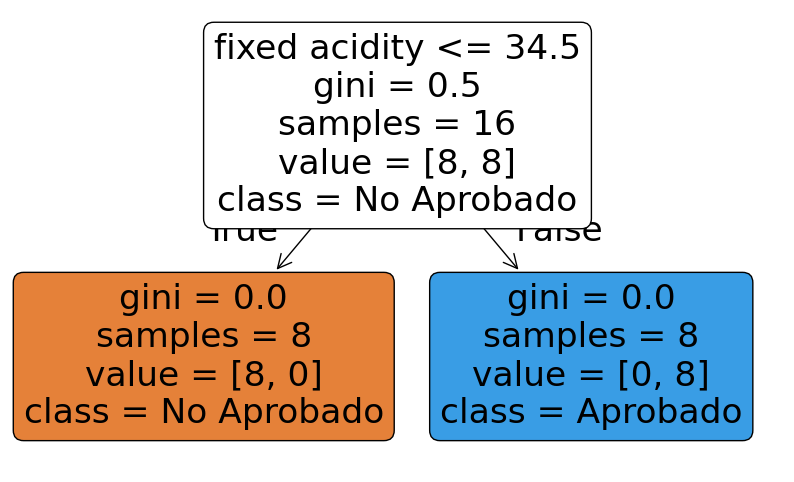

In [43]:
# 11. Graficar el Árbol de Decisión
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"],
filled=True, rounded=True)
plt.show()

**EJERCICIOS**


---

Una bodega vinícola desea clasificar la calidad del vino tinto utilizando un modelo de Árbol de
Decisión. Para ello, se cuenta con un conjunto de datos que contiene diversas características
químicas y organolépticas de diferentes muestras de vino, como:

• Acidez fija

• Acidez volátil

• Azúcares residuales

• Dióxido de azufre

• pH

• Alcohol

• Densidad

• Sulfatos

El objetivo es desarrollar un modelo de clasificación que prediga la calidad del vino en función
de estas características. La calidad del vino está representada por un número entero de 3 a 8,
donde valores más altos indican mejor calidad.

**Tareas principales del ejercicio:**

• Explorar y visualizar el conjunto de datos.




In [27]:
# Cargar y explorar el dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
ruta = "/content/SI_L08_ARBOLES_DECISION.csv"
df = pd.read_csv(ruta)

# Mostrar las primeras filas y descripción estadística
print(df.head())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<ipython-input-28-2d61bc7aab9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
<ipython-input-28-2d61bc7aab9b>:3: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='quality', palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])


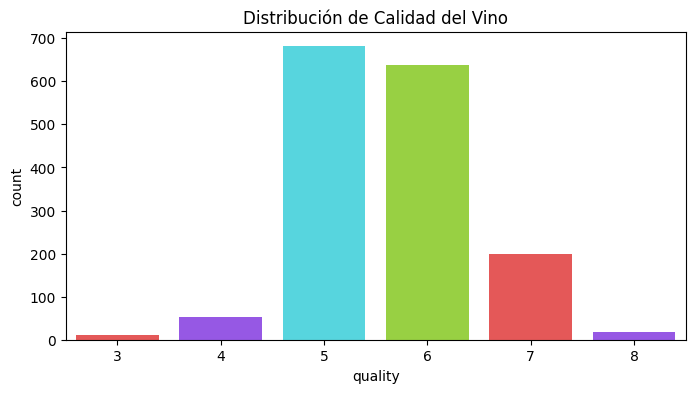

In [28]:
# Visualización de la distribución de la variable objetivo "quality"
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='quality', palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
plt.title("Distribución de Calidad del Vino")
plt.show()


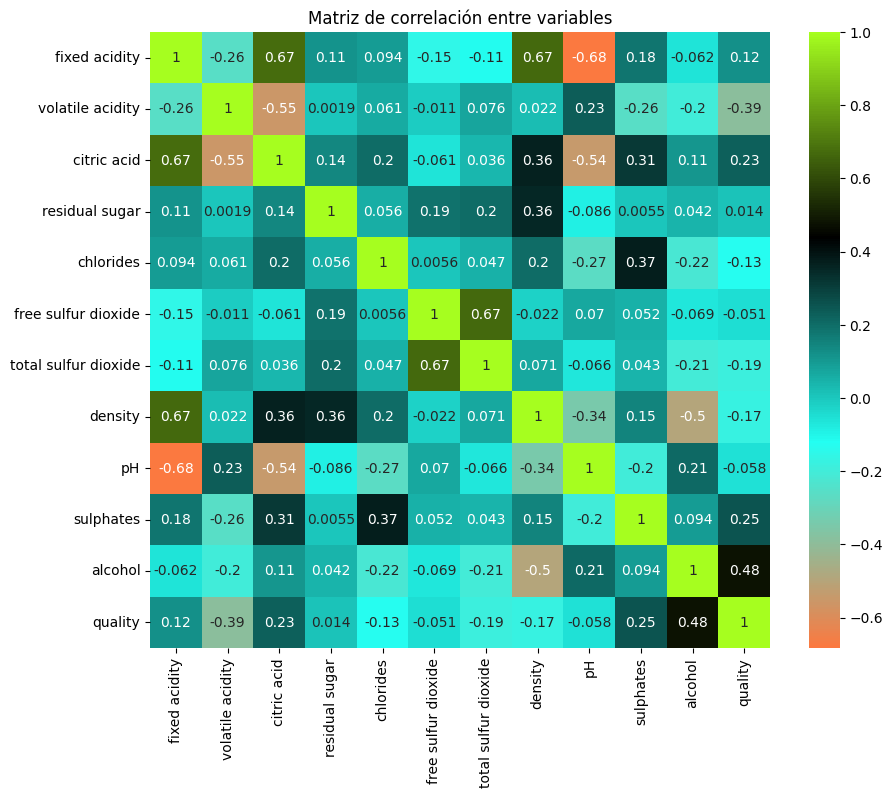

In [29]:
from matplotlib.colors import LinearSegmentedColormap

custom_palette = ['#fb7940', '#23fff2', '#000000', '#a6fe1f']
custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", custom_palette)

# Visualizar relaciones entre variables y calidad
# Matriz de correlación con heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=custom_cmap)
plt.title("Matriz de correlación entre variables")
plt.show()

• Entrenar un modelo de Árbol de Decisión para clasificar la calidad del vino.


In [31]:
#Preparar datos para entrenamiento
from sklearn.model_selection import train_test_split

# Variables independientes X y variable objetivo y
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir en conjunto entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Entrenar el modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo con profundidad inicial (ajustable)
modelo = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)


• Evaluar el rendimiento del modelo mediante métricas adecuadas.



Precisión: 0.559

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.53      0.56      0.54       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


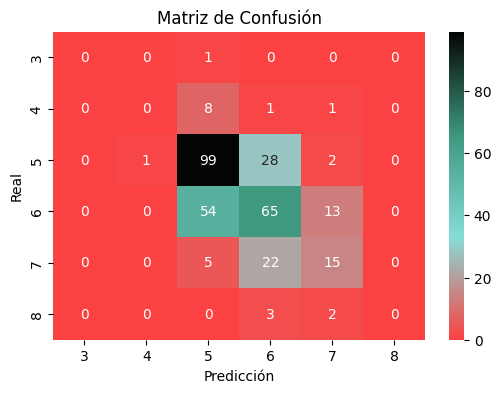

In [33]:
from matplotlib.colors import LinearSegmentedColormap

# Definir la paleta de color personalizada
custom_palette = ['#fb4141', '#86dcd8', '#3d977d', '#040404']
custom_cmap = LinearSegmentedColormap.from_list("custom_confusion", custom_palette)

# Predecir en conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de rendimiento
print(f"Precisión: {accuracy_score(y_test, y_pred):.3f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

• Interpretar la importancia de las variables y visualizar el árbol de decisión.

In [34]:
import numpy as np
from sklearn.tree import plot_tree

# Importancia de variables
importancias = modelo.feature_importances_
indices = np.argsort(importancias)[::-1]

print("Importancia de características:")
for i in indices:
    print(f"{X.columns[i]}: {importancias[i]:.3f}")

Importancia de características:
alcohol: 0.398
sulphates: 0.173
total sulfur dioxide: 0.116
volatile acidity: 0.074
fixed acidity: 0.061
free sulfur dioxide: 0.061
pH: 0.055
residual sugar: 0.031
density: 0.020
chlorides: 0.011
citric acid: 0.000


<ipython-input-39-ddd3a5bf47b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
<ipython-input-39-ddd3a5bf47b8>:3: UserWarning: 
The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])


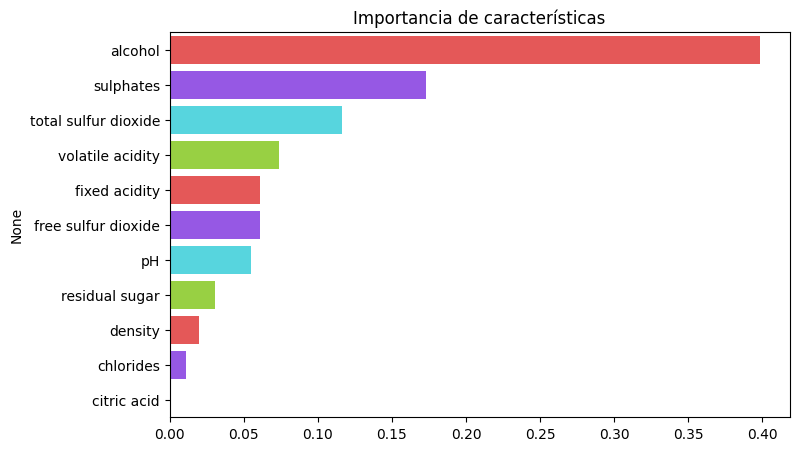

In [39]:
# Gráfico importancia
plt.figure(figsize=(8,5))
sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
plt.title("Importancia de características")
plt.show()

**Responda a las siguientes interrogantes:**

• ¿Cuáles son las características químicas más influyentes en la calidad del vino?



<ipython-input-40-e49126aad55b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
<ipython-input-40-e49126aad55b>:2: UserWarning: 
The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])


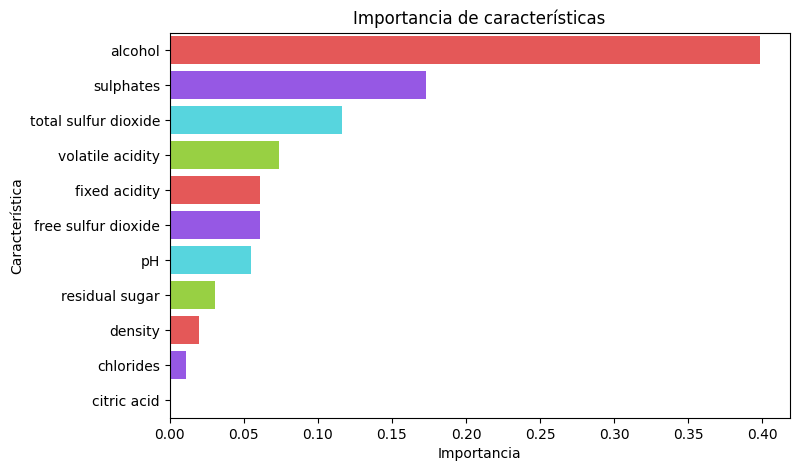

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=importancias[indices], y=X.columns[indices], palette=['#fb4141', '#9341fb', '#41e9f4', '#9de72c'])
plt.title("Importancia de características")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()


• ¿Qué nivel de precisión tiene el modelo de Árbol de Decisión al clasificar la calidad del
vino?



In [41]:
print(f"Precisión: {accuracy_score(y_test, y_pred):.3f}")


Precisión: 0.559


• ¿Se puede mejorar la clasificación ajustando la profundidad del árbol o usando poda?

In [42]:
from sklearn.metrics import accuracy_score

for d in range(2, 11):
    modelo_tmp = DecisionTreeClassifier(max_depth=d, random_state=42)
    modelo_tmp.fit(X_train, y_train)
    y_pred_tmp = modelo_tmp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_tmp)
    print(f"Precisión con profundidad {d}: {acc:.3f}")


Precisión con profundidad 2: 0.531
Precisión con profundidad 3: 0.528
Precisión con profundidad 4: 0.531
Precisión con profundidad 5: 0.559
Precisión con profundidad 6: 0.537
Precisión con profundidad 7: 0.550
Precisión con profundidad 8: 0.562
Precisión con profundidad 9: 0.541
Precisión con profundidad 10: 0.553
